In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.lines as mlines
from sklearn import neighbors, metrics
from matplotlib import pyplot as plt

In [2]:
# fxn for plotting
def get_ax(figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

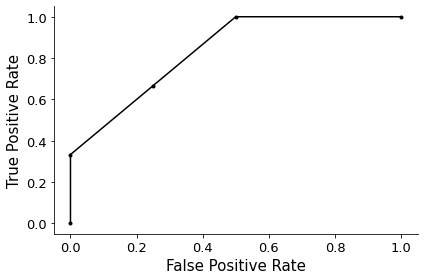

In [3]:
fpr = [0, 0, 1/4, 2/4, 4/4]
tpr = [0, 2/6, 4/6, 6/6, 6/6]

ax=get_ax()

plt.plot(fpr, tpr, c="0", marker=".")

# axies settings
fsize=15
plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("False Positive Rate", size=fsize)
plt.ylabel("True Positive Rate", size=fsize)

plt.tight_layout()
plt.savefig("Plots/ROC1.pdf")

In [4]:
# D is the name of the data file
# returns a df with columns x_1, x_2, y of float values
def read_data(D):
    df = pd.read_csv("data/"+D, sep = " ", names = ["x_1", "x_2", "y"])
    return df

In [5]:
# get D2z.txt into a dataframe
D2z_df = read_data("D2z.txt")

In [6]:
# x_i are floats, df is a datafram
# returns predicted class based on nearest neighbor
def oneNN(x_1, x_2, df):
    # init vars to store best info
    best_dist = None
    best_y = 1
    # loop through df
    for i, row in df.iterrows():
        # calculate euclidean distance
        dist = np.sqrt((row[0]-x_1)**2+(row[1]-x_2)**2)
        # if the distance is the first calculated, it is the best
        if best_dist == None:
            best_dist = dist
            best_y = row[2]
        # replace old best distance if we find a better one
        elif dist < best_dist:
            best_dist = dist
            best_y = row[2]
    return best_y

In [7]:
# make a grid, predict each point
d1 = {"x_1":[], "x_2":[], "y":[]}
grid_x = np.linspace(-2, 2, 20)
for x_1 in grid_x:
    for x_2 in grid_x:
        y = oneNN(x_1, x_2, D2z_df)
        d1["x_1"].append(x_1)
        d1["x_2"].append(x_2)
        d1["y"].append(int(y))

boundary_df = pd.DataFrame(d1)

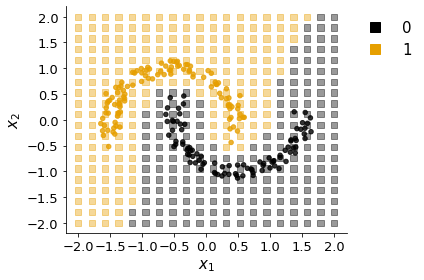

In [8]:
# make axies
ax = get_ax()

# set colors (colorblind friendly via https://yoshke.org/blog/colorblind-friendly-diagrams)
colors = {0: '#000000', 1: '#E69F00'}

# make plot
boundary_df.plot.scatter(x="x_1", y="x_2", c=boundary_df["y"].map(colors), marker="s", s=40, alpha=0.4, ax=ax)
D2z_df.plot.scatter(x="x_1", y="x_2", c=D2z_df["y"].map(colors), alpha=0.8, ax=ax)

# plot settings
fsize = 15
# legend
b_dot = mlines.Line2D([], [], color='#000000', marker='s', linestyle='None',
                          markersize=10, label='0')
o_dot = mlines.Line2D([], [], color='#E69F00', marker='s', linestyle='None',
                          markersize=10, label='1')
ax.legend(handles=[b_dot, o_dot], fontsize=fsize, bbox_to_anchor=(1, 1), frameon=False)

# axies settings
plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("$x_1$", size=fsize)
plt.ylabel("$x_2$", size=fsize)

plt.tight_layout()
plt.savefig("Plots/boundary_plot.pdf")

In [9]:
# get emails.csv as a df
emails_df = pd.read_csv("data/emails.csv")

In [10]:
# make train and test dfs
# train dfs dont need the 'email number' or 'prediction' columns
# test dfs dont need the 'email number' column

single_train_df = emails_df[:4000].drop(["Email No.", "Prediction"], axis=1)
single_test_df = emails_df[4000:].drop("Email No.", axis=1)

f1_test_df = emails_df[:1000].drop("Email No.", axis=1)
f1_train_df = emails_df[1000:].drop("Email No.", axis=1)

f2_test_df = emails_df[1000:2000].drop("Email No.", axis=1)
f2_train_df = emails_df.iloc[np.r_[0:1000, 2000:5000]].drop("Email No.", axis=1)

f3_test_df = emails_df[2000:3000].drop("Email No.", axis=1)
f3_train_df = emails_df.iloc[np.r_[0:2000, 3000:5000]].drop("Email No.", axis=1)

f4_test_df = emails_df[3000:4000].drop("Email No.", axis=1)
f4_train_df = emails_df.iloc[np.r_[0:3000, 4000:5000]].drop("Email No.", axis=1)

f5_test_df = emails_df[4000:].drop("Email No.", axis=1)
f5_train_df = emails_df[:4000].drop("Email No.", axis=1)

In [11]:
# # create the classifier
# knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
# # train the classifier
# knn1.fit(f1_train_df.drop("Prediction", axis=1), f1_train_df["Prediction"])
# # make predictions
# pred_1 = knn1.predict(f1_test_df.drop("Prediction", axis=1))

# # find and print the accuracy, precision and recall
# acc_1 = metrics.accuracy_score(f1_test_df["Prediction"], pred_1)
# pre_1 = metrics.precision_score(f1_test_df["Prediction"], pred_1)
# rec_1 = metrics.recall_score(f1_test_df["Prediction"], pred_1)
# print(f"fold 1: acc: {acc_1}, pre: {pre_1}, rec: {rec_1}")

# # thses steps are repeated for the other folds

In [12]:
# knn2 = neighbors.KNeighborsClassifier(n_neighbors=1)
# knn2.fit(f2_train_df.drop("Prediction", axis=1), f2_train_df["Prediction"])
# pred_2 = knn2.predict(f2_test_df.drop("Prediction", axis=1))
# acc_2 = metrics.accuracy_score(f2_test_df["Prediction"], pred_2)
# pre_2 = metrics.precision_score(f2_test_df["Prediction"], pred_2)
# rec_2 = metrics.recall_score(f2_test_df["Prediction"], pred_2)
# print(f"fold 2: acc: {acc_2}, pre: {pre_2}, rec: {rec_2}")

In [13]:
# knn3 = neighbors.KNeighborsClassifier(n_neighbors=1)
# knn3.fit(f3_train_df.drop("Prediction", axis=1), f3_train_df["Prediction"])
# pred_3 = knn3.predict(f3_test_df.drop("Prediction", axis=1))
# acc_3 = metrics.accuracy_score(f3_test_df["Prediction"], pred_3)
# pre_3 = metrics.precision_score(f3_test_df["Prediction"], pred_3)
# rec_3 = metrics.recall_score(f3_test_df["Prediction"], pred_3)
# print(f"fold 3: acc: {acc_3}, pre: {pre_3}, rec: {rec_3}")

In [14]:
# knn4 = neighbors.KNeighborsClassifier(n_neighbors=1)
# knn4.fit(f4_train_df.drop("Prediction", axis=1), f4_train_df["Prediction"])
# pred_4 = knn4.predict(f4_test_df.drop("Prediction", axis=1))
# acc_4 = metrics.accuracy_score(f4_test_df["Prediction"], pred_4)
# pre_4 = metrics.precision_score(f4_test_df["Prediction"], pred_4)
# rec_4 = metrics.recall_score(f4_test_df["Prediction"], pred_4)
# print(f"fold 4: acc: {acc_4}, pre: {pre_4}, rec: {rec_4}")

In [15]:
# knn5 = neighbors.KNeighborsClassifier(n_neighbors=1)
# knn5.fit(f5_train_df.drop("Prediction", axis=1), f5_train_df["Prediction"])
# pred_5 = knn5.predict(f5_test_df.drop("Prediction", axis=1))
# acc_5 = metrics.accuracy_score(f5_test_df["Prediction"], pred_5)
# pre_5 = metrics.precision_score(f5_test_df["Prediction"], pred_5)
# rec_5 = metrics.recall_score(f5_test_df["Prediction"], pred_5)
# print(f"fold 5: acc: {acc_5}, pre: {pre_5}, rec: {rec_5}")

In [94]:
# z is a number
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient(x, theta, y):
    return x * float((sigmoid(theta.T @ x) - y))
    
def grad_desc(df, rate):
    theta = np.zeros(len(df.drop("Prediction", axis=1).iloc[0]))
    for i, row in df.iterrows():
        y = row[-1]
        theta = theta - rate * gradient(row[:-1], theta, y)
    return theta

In [95]:
df = pd.DataFrame({"1":[1], "2":[3], "3": [2], "Prediction":[1]})
grad_desc(df, 0.1)

1    0.05
2    0.15
3    0.10
Name: 0, dtype: float64

In [96]:
grad_desc(f1_train_df, 0.1)

<ipython-input-94-4cf578e5414c>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


the              -34.799355
to               -43.067415
ect              -89.724408
and                4.205303
for              -19.998081
                    ...    
infrastructure     0.600000
military           1.300000
allowing           0.000000
ff                -2.722358
dry               -0.700000
Length: 3000, dtype: float64